<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/ch01_04_DNN%EA%B8%B0%EC%B4%88_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.04 DNN기초 - 이진분류 모델


---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 이진분류 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 11장, 13장
* 데이터
  * `sornar.csv`
  * `pima-indians-diabetes.csv`


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
!git clone https://github.com/LeeHuiJong/-Deep_learning

Cloning into '-Deep_learning'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 154 (delta 16), reused 1 (delta 1), pack-reused 105
Receiving objects: 100% (154/154), 81.25 MiB | 14.08 MiB/s, done.
Resolving deltas: 100% (57/57), done.


## 소나 데이터 광물 예측
---

> 1988년 존스홉킨스 대학교의 세즈노프스키(Sejnowski) 교수는 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터를 정리했습니다. 신경망이 광석과 돌을 얼마나 잘 구분하는지 알아보도록 합시다.

```
- 0~59 : 음파 탐지기를 이용해 얻은 값
- 60: 광석 구분 {R, M}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-01.PNG?raw=true width=450>
</p>




### | 데이터 준비

#### **데이터 로드**
* `sonar.csv`

In [37]:
data_path = '/content/-Deep_learning/dataset/sonar.csv'
df = pd.read_csv(data_path, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


#### **데이터 전처리**

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def path2data_sonar(path, seed = 1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header = None, # 첫번째 행이 데이터 (컬럼 없음)
                   )
  
  
  # x,y 분할
  x = df.values[:, :-1] # 모든행(샘플), 0부터 마지막 전까지 열(속성)
  y = df.values[:, -1] # 모든행(샘플), 마지막 번째 열(속성)
  
  # 정규화 전처리(x의 모든속성, y는 하지 않음)
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  
  # y 라벨링(x는 하지 않는다.)
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                      random_state = seed, 
                                                      stratify = y) # train, test 분할시 클래스 비율 비슷하게 유지
  
  return x_train, x_test, y_train, y_test

data_path = '/content/-Deep_learning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2data_sonar(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])

(145, 60) (63, 60) (145,) (63,)
[-0.73091423  0.14791278  0.43217734 -0.193733   -0.27973353 -1.17141213
 -1.11368502 -1.1830759  -0.61643936  0.02789771 -0.54396541 -0.43025161
  0.20832115 -0.57696915 -1.27359777 -0.60100177 -0.1911599  -0.2737382
  0.34226731  0.25514539 -0.11259861 -0.65372658 -0.80968198 -1.27254722
 -0.12615184  0.8203173   0.79833763 -0.82844031 -1.28832161 -1.57084217
 -1.63565539 -0.34053744  0.08145143 -0.41196074 -0.34881305  0.09887612
  0.77837874  0.34473565  1.128427    1.06935769  0.14029395  0.01132786
 -0.08251782  0.11825963 -0.54032991 -0.66033662 -0.69576299 -0.9575622
 -0.19317929 -0.27318109 -0.69023617 -0.53275402 -0.71118685  0.88684983
  1.34495706 -0.49309408  0.62024838  1.80515572  1.09602656 -0.0612105 ] 1


* 예측값 분포 확인

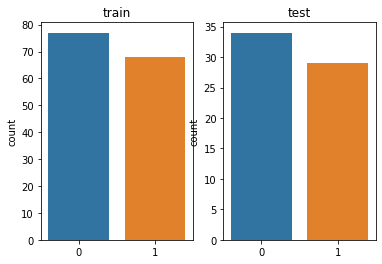

In [39]:
plt.subplot(121);sns.countplot(x=y_train);plt.title('train')
plt.subplot(122);sns.countplot(x=y_test);plt.title('test')
plt.show()

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-02.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [40]:
from tensorflow.keras import models, layers, utils

def build_model():
  x = layers.Input(shape = (60,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(30, activation = 'relu')(x)
  y = layers.Dense(1, activation = 'sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정(회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수가 sigmoid)
  model = models.Model(x, y, name='sonar_classifier')

  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "sonar_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


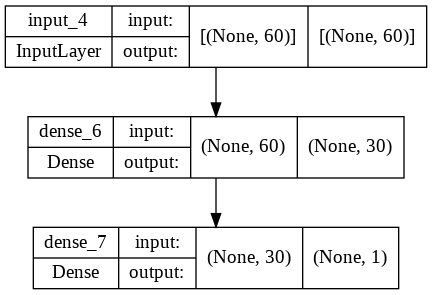

In [41]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes = True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 'binary_crossentropy'
* `optimizer` : 'adam'
* `metrics`: 'accuracy'


In [42]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 (업데이트 한번에 사용될 샘플 개수)

In [43]:
model.fit(x_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.7025 - accuracy: 0.5724
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.6690
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.7448
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7931
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8207
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.8276
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8345
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8552
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8483
Epoch 11/

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [45]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.6305 - accuracy: 0.8413


[0.6304829120635986, 0.841269850730896]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [46]:
y_pred = model.predict(x_test).flatten()
print(y_pred[0], y_test[0])
y_pred.shape, y_test.shape

0.08204478 1


((63,), (63,))

In [47]:
np.round(y_pred)# 반올림 (0.5 기준으로)

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.], dtype=float32)

* 예측 시각화

[[28  6]
 [ 4 25]]


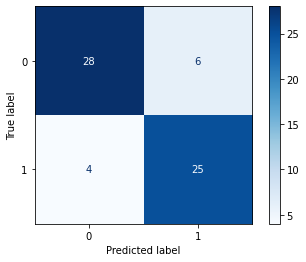

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 함수 인풋 배열은 정수가 되야 한다.
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0 에서 1 사이의 확률 값
* 예측값의 shape : (샘플개수, ) 혹은 (샘플개수, 1)
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : sigmoid
* 손실함수 (loss) : binary_crossentropy
* 평가함수 (metrics) : accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def path2data_sonar(path, seed = 1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header = None, # 첫번째 행이 데이터 (컬럼 없음)
                   )
  
  
  # x,y 분할
  x = df.values[:, :-1] # 모든행(샘플), 0부터 마지막 전까지 열(속성)
  y = df.values[:, -1] # 모든행(샘플), 마지막 번째 열(속성)
  
  # 정규화 전처리(x의 모든속성, y는 하지 않음)
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  
  # y 라벨링(x는 하지 않는다.)
  labeling = LabelEncoder()
  y = labeling.fit_transform(y)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                      random_state = seed, 
                                                      stratify = y) # train, test 분할시 클래스 비율 비슷하게 유지
  
  return x_train, x_test, y_train, y_test

data_path = '/content/-Deep_learning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2data_sonar(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])


# 모델 생성
def build_model():
  x = layers.Input(shape = (60,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(30, activation = 'relu')(x)
  y = layers.Dense(1, activation = 'sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정(회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수가 sigmoid)
  model = models.Model(x, y, name='sonar_classifier')

  return model

# 학습
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 100, batch_size = 16)

# 예측
y_pred = model.predict(x_test).flatten()
cm = confusion_matrix(y_test, np.round(y_pred)) # 함수 인풋 배열은 정수가 되야 한다.
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

### | 과제 3. 피마 인디언 당뇨병 예측


* `pima-indians-diabetes.csv`
```
df = pd.read_csv(data_path,
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
```

In [3]:
df = pd.read_csv('/content/-Deep_learning/dataset/pima-indians-diabetes.csv',
              names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


(537, 8) (231, 8) (537,) (231,)
[-0.84488505 -0.74783062  0.04624525  1.22091023 -0.69289057  0.77514938
 -0.76673656 -0.27575966] 0.0
Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.6443
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6611
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.6853
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7058
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7430
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7467
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7616
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7672
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 

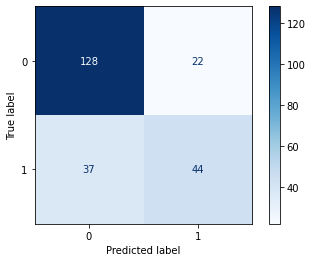

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def path2data_sonar(path, seed = 1):
  # 데이터 적절히 불러오기
  df = pd.read_csv('/content/-Deep_learning/dataset/pima-indians-diabetes.csv',
                   names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
  
  
  # x,y 분할
  x = df.values[:, :-1] # 모든행(샘플), 0부터 마지막 전까지 열(속성)
  y = df.values[:, -1] # 모든행(샘플), 마지막 번째 열(속성)
  
  # 정규화 전처리(x의 모든속성, y는 하지 않음)
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                      random_state = seed, 
                                                      stratify = y) # train, test 분할시 클래스 비율 비슷하게 유지
  
  return x_train, x_test, y_train, y_test

data_path = '/content/-Deep_learning/dataset/pima-indians-diabetes.csv'
x_train, x_test, y_train, y_test = path2data_sonar(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])


# 모델 생성
def build_model():
  x = layers.Input(shape = (8),) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(20, activation = 'relu')(x)
  z = layers.Dense(20, activation = 'relu')(x)
  y = layers.Dense(1, activation = 'sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정(회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수가 sigmoid)
  model = models.Model(x, y, name='pima_classifier')

  return model

# 학습
model = build_model()
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 200, batch_size = 16)

# 예측 및 결과 시각화
y_pred = model.predict(x_test).flatten()
cm = confusion_matrix(y_test, np.round(y_pred)) # 함수 인풋 배열은 정수가 되야 한다.
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

### | 과제 4. 생각해보기

데이터가 불균형 할 때 딥러닝에서는 어떠한 방법을 써서 이를 해결 하나요? 


In [ ]:
# under sampling 이나 over sampling 을 통해 균형을 맞춰준다
# x,y 라는 데이터 셋이 존재할때 y의 데이터 양이 너무 적거나 많을 경우 그 비율에 맞춰서 x의 데이터 양을 조절해주는 기법을 말한다.